Hypergeometric(ns=100, nf=400, n=100)

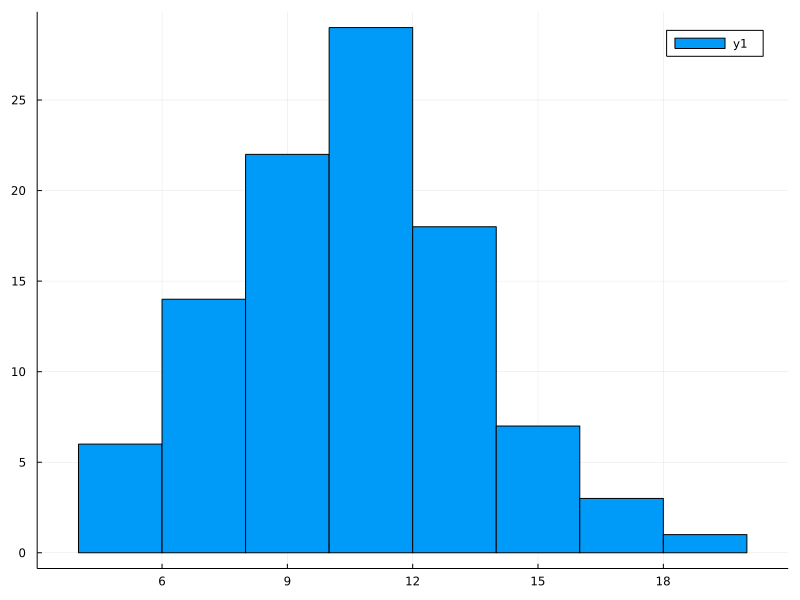

In [9]:
histogram(rand(a,100), size = (800,600))

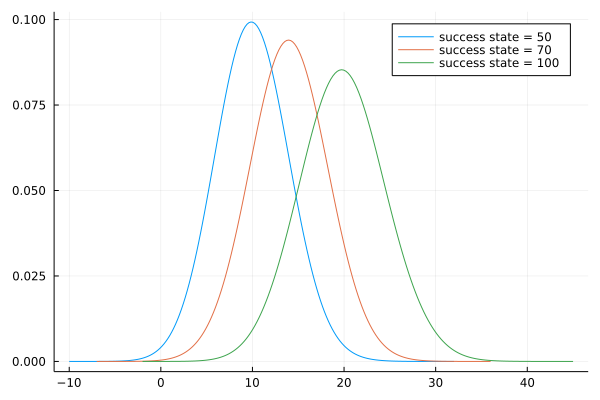

In [225]:
using StatsPlots
using Distributions; Plots
a = Hypergeometric(50,450,100)
b = Hypergeometric(70,430,100)
c = Hypergeometric(100,400,100)
sample_a = rand(a,1000)
sample_b = rand(b,1000)
sample_c = rand(c,1000)
density(sample_a,bandwidth = 3, label = "success state = 50")
density!(sample_b,bandwidth = 3, label = "success state = 70")
density!(sample_c,bandwidth = 3, label = "success state = 100")


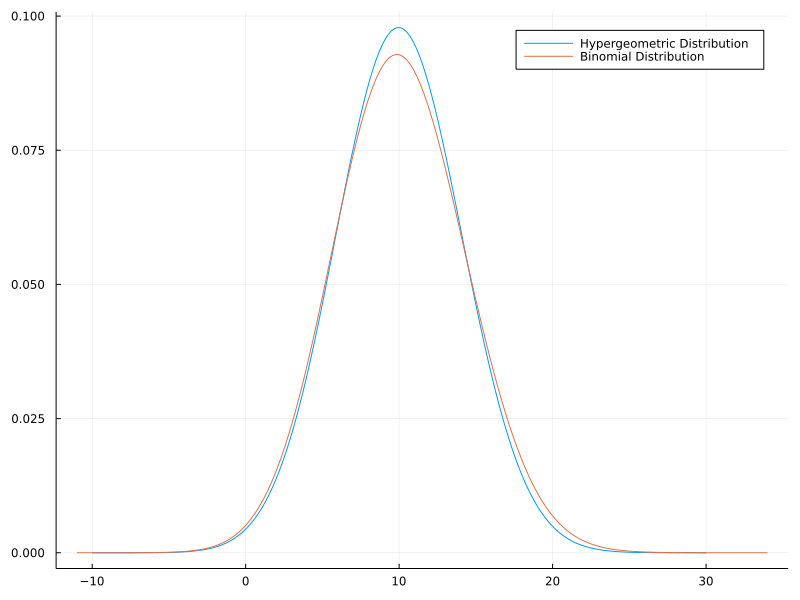

In [237]:
using StatsPlots
using Distributions; Plots
a = Hypergeometric(50,450,100)
sample_a = rand(a,1000)
density(sample_a,bandwidth = 3, label = "Hypergeometric Distribution", size = (800,600))
sample_b = rand(Binomial(100,0.1),1000)
density!(sample_b,bandwidth = 3, label = "Binomial Distribution")

In [230]:
?Binomial

search: Binomial binomial PoissonBinomial NegativeBinomial BetaBinomial



```
Binomial(n,p)
```

A *Binomial distribution* characterizes the number of successes in a sequence of independent trials. It has two parameters: `n`, the number of trials, and `p`, the probability of success in an individual trial, with the distribution:

$$
P(X = k) = {n \choose k}p^k(1-p)^{n-k},  \quad \text{ for } k = 0,1,2, \ldots, n.
$$

```julia
Binomial()      # Binomial distribution with n = 1 and p = 0.5
Binomial(n)     # Binomial distribution for n trials with success rate p = 0.5
Binomial(n, p)  # Binomial distribution for n trials with success rate p

params(d)       # Get the parameters, i.e. (n, p)
ntrials(d)      # Get the number of trials, i.e. n
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Binomial distribution on Wikipedia](http://en.wikipedia.org/wiki/Binomial_distribution)


In [156]:
a = Hypergeometric(20,80,5)
sample_a = rand(a,1000)
sum(sample_a .== 0)

321

In [124]:
sum(sample_a .== 10)

1449

In [121]:
sample_a 

1000-element Vector{Int64}:
  9
 13
  7
  9
  5
  4
 10
  8
  7
 16
  9
  9
  8
  ⋮
 10
  6
 15
  7
  8
 12
 11
  9
 11
 10
  9
  6

9.061

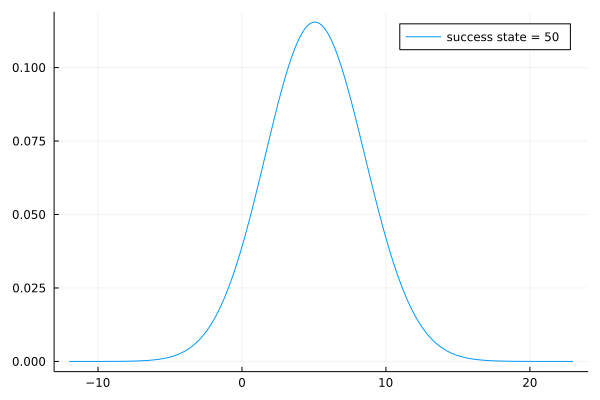

In [178]:
a = Hypergeometric(20,75,24)
sample = rand(a,1000)
density(sample,bandwidth = 3, label = "success state = 50")


1000-element Vector{Int64}:
 12
 13
 13
 14
 11
 14
 13
 13
 12
 15
  8
  9
 11
  ⋮
 11
 11
  7
 15
 12
 10
 14
 13
  8
 15
 12
  9

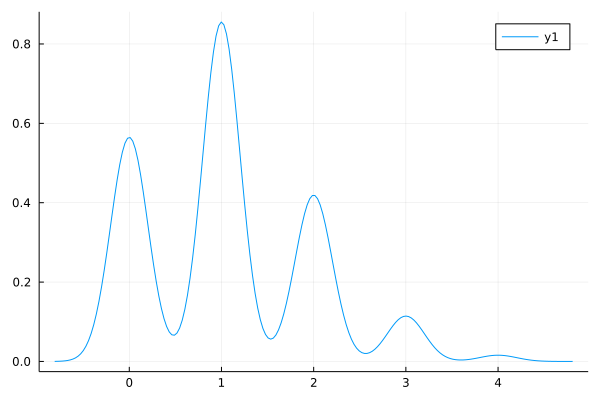

In [44]:
density(sample,normalize = true)

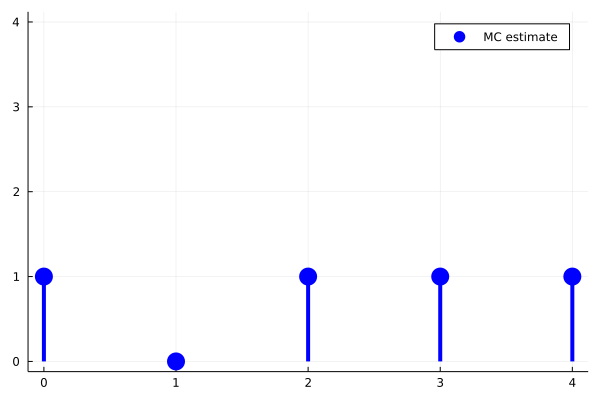

In [45]:
plot(0:4, sample, line=:stem, marker=:circle, 
    c=:blue, ms=10, msw=0, lw=4, label="MC estimate")

In [140]:
import Pkg; Pkg.add("GR")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed Glib_jll ───── v2.68.3+1
   Installed HarfBuzz_jll ─ v2.8.1+1
    Updating `~/.julia/environments/v1.6/Project.toml`
  [28b8d3ca] + GR v0.59.0
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [7746bdde] ↑ Glib_jll v2.68.3+0 ⇒ v2.68.3+1
  [2e76f6c2] ↑ HarfBuzz_jll v2.8.1+0 ⇒ v2.8.1+1
Precompiling project...
  ✓ Glib_jll
  ✓ Qt5Base_jll
  ✓ Cairo_jll
  ✓ HarfBuzz_jll
  ✓ libass_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  ✓ Makie
  ✓ StatsPlots
  12 dependencies successfully precompiled in 75 seconds (343 already precompiled)
  11 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [62]:
N = 100
s = 20
n = 5
hypergeom_p(100, 20, 5, 2)

LoadError: UndefVarError: Mchoosex not defined

In [67]:
function hypergeom_p(N, M, n, k)  
    "
    Probability Mass Function for Hypergeometric Distribution
    :N: population size
    :M: the number of success states in the population
    :n: the number of draws (i.e. quantity drawn in each trial)
    :k: number of observed successes
    :returns: PMF computed at F
    "
    Mchoosek = binomial(M,k)
    NMchoosenk = binomial(N-M, n-k)
    Nchoosen = binomial(N,n)
    
    return (Mchoosek)*NMchoosenk/Nchoosen
end


hypergeom_p(big(500), 50, 100, 10)

0.1473678442041174725532519005369637770316000596544853332755559427446015362612881

In [202]:
1/11238513 * (25/26)*1000000

0.0855574453255926

In [211]:
a = hypergeom_p(big(69), 5, 5, 4)*(25/26) + hypergeom_p(big(69), 5, 5, 3)*(1/26) 
a*100

0.009637190641474749623585785753721582379735031093178763952134948813957860795284821

In [210]:
a = hypergeom_p(big(69), 5, 5, 4)*(1/26) 
a*50000

0.05475676500837925967395268977216398762316870182386450947736591130872918863910198

In [213]:
a = hypergeom_p(big(69), 5, 5, 3)*(25/26) + hypergeom_p(big(69), 5, 5, 2)*(1/26) 
a*7

0.0220549298100749978629528598667815885958927572339238184802562403051008616531385

In [216]:
a = hypergeom_p(big(69), 5, 5, 1)*(1/26) + hypergeom_p(big(69), 5, 5, 0)*(1/26) 
a*4

0.1478623208768469171020387979208834796502483576326688804381860838707042470832211

In [206]:
hypergeom_p(big(69), 5, 5, 4)*(1/26) * 50000

0.05475676500837925967395268977216398762316870182386450947736591130872918863910198

In [221]:
1/hypergeom_p(big(69), 5, 5, 5)*26

2.92201338e+08

In [222]:
1/292201338 + 1/10806265 + 1/913129 + 1/10376 + 1/317+1/27


0.04028917851914725

In [58]:
$P(X = k) = \frac{m \choose k}{N \choose n}$

LoadError: syntax: "\" is not a unary operator

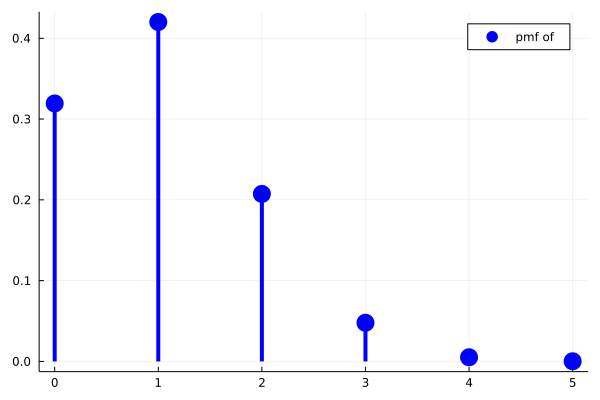

In [159]:
x = 0:5
y = [hypergeom_p(100, 20, 5, i) for i in x]
plot(x, y, line=:stem, marker=:circle, 
    c=:blue, ms=10, msw=0, lw=4, label="pmf of ")


In [162]:
5*95/20

23.75

In [160]:
hypergeom_p(100, 20, 5, 0)

0.31930944198985434

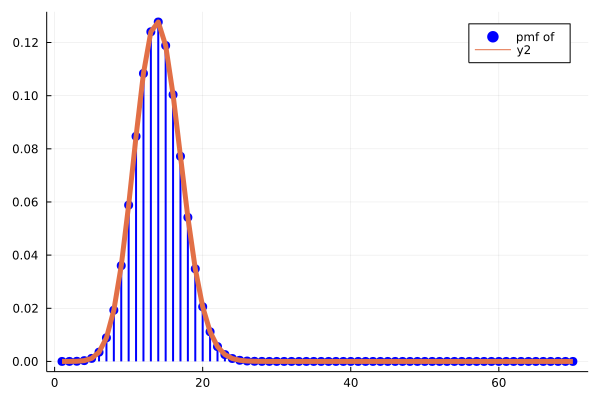

In [118]:
x = 1:70
y = [hypergeom_p(big(500), big(70), 100, i) for i in x]
plot(x, y, line=:stem, marker=:circle, 
    c=:blue, ms=5, msw=0, lw=2, label="pmf of ")
plot!(x,y, mode = "lines", lw=5)

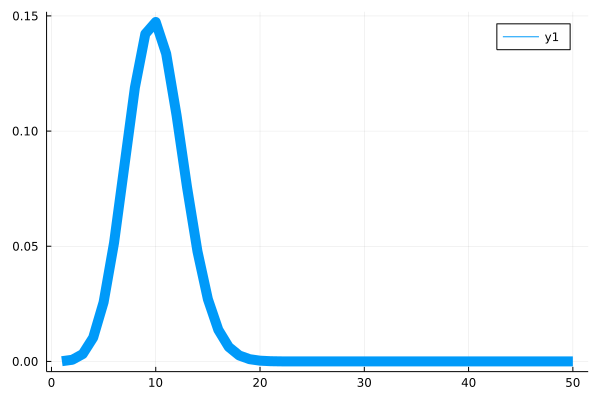

In [96]:

plot(x, y, linewidth = 10)

In [97]:
?plot

search: plot plot! Plot plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr(attr)` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.
